# **Importing data**
---

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Suppress only user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df= pd.read_csv("apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# **Analysing Data**
---

In [7]:
df.shape

(4001, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [9]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [10]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [25]:
# removing data error
df = df[df['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']

### **KDE Plot**

[]

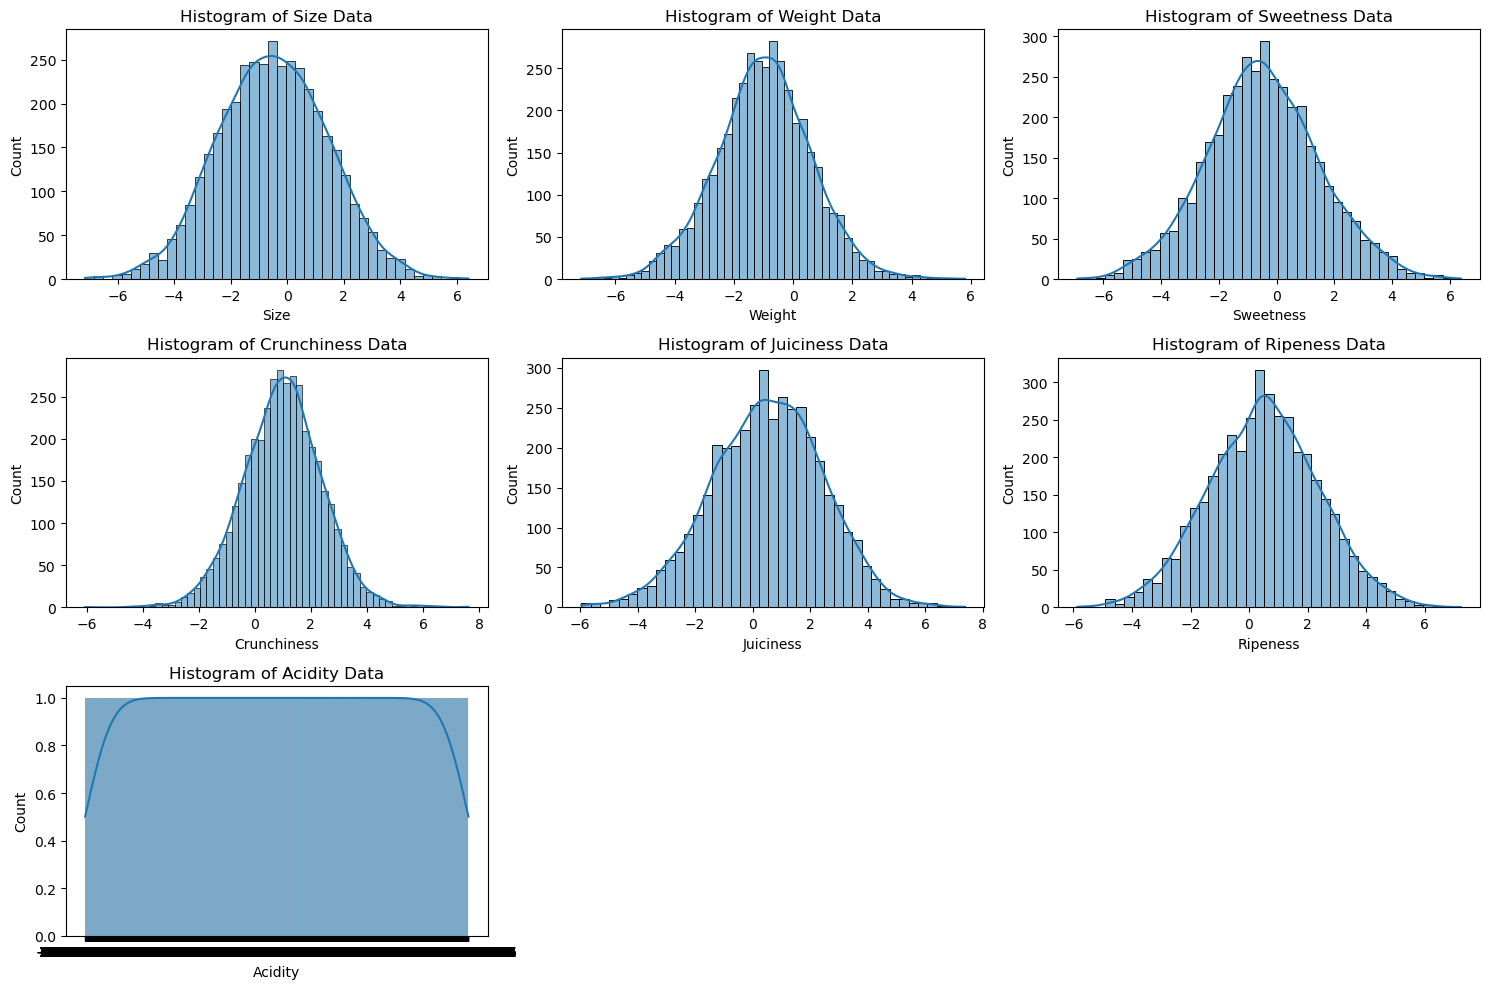

In [41]:
plt.figure(figsize=(15,10))

rows = 3
cols = 3

for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(rows, cols,i)
    plt.title(f"Histogram of {col} Data")
    sns.histplot(df[col], kde=True)  
    plt.tight_layout()

plt.plot()

# **Data Cleaning**
---

- ### Dropping `unnecessary` features

In [18]:
# dropping features not required
df.drop("A_id", axis = 1, inplace = True)
df.columns

KeyError: "['A_id'] not found in axis"

- ### Removing `null` items

In [19]:
# checking for null values
df.isna().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [5]:
# checking shape before deleting null values
df.shape

(4001, 8)

In [6]:
# dropping null values
df.dropna(inplace=True)

# resetting index
df.reset_index(drop=True, inplace=True)

# checking shape after removing null values
df.shape

(4000, 8)

# **Data Preprocessing**
---

- ### Converting `target` column to `0` and `1`

In [7]:
# checking all types of data in target
df["Quality"].unique()

array(['good', 'bad'], dtype=object)

In [8]:
# setting 'good' to 1 and 'bad' to 0
df.loc[df['Quality'] == 'good', 'Quality'] = 1
df.loc[df['Quality'] != 1, 'Quality'] = 0

In [9]:
# checking changes
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


# **Classification**
---

In [10]:
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

- ### `Heatmap` for features

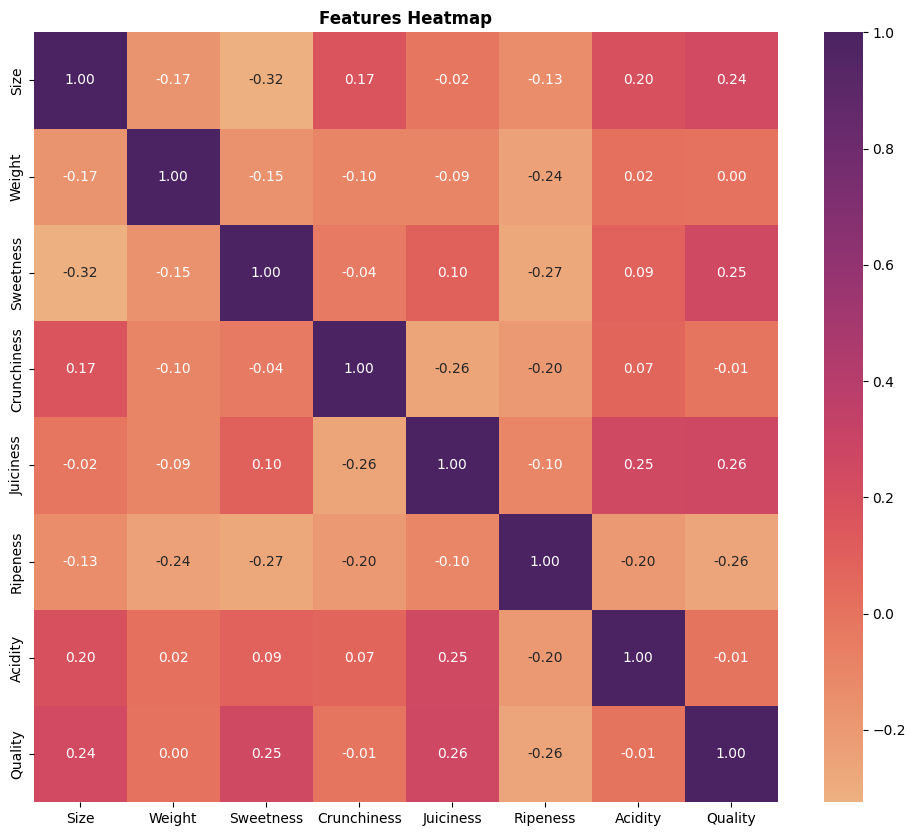

In [11]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[:-1].corr(), cmap='flare', annot=True, fmt=".2f")
plt.title('Features Heatmap', fontweight = 'bold')
plt.show()

- There is `not much` of a `strong` correlation between the features so we keep all of them all.

- ### `Split` Data

In [12]:
# library to split data
from sklearn.model_selection import train_test_split

In [13]:
# declaring features and target
X = df.drop("Quality", axis = 1)
y = df['Quality']

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)